In [2]:
C11 = 70.0136, -166.85755
C1 = 70.8357, -163.1044
C4 = 71.038916, -160.50353

from glob import glob
import numpy as np
from evFileProcessing import evFuncs # ev COM functions
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

filesD1Y1 = glob('../data/2018/EVFiles/DAFT1/exports/Loaded*.csv')
filesD1Y2 = glob('../data/2019/EVFiles/DAFT1/exports/Loaded*.csv')
filesD2Y1 = glob('../data/2018/EVFiles/DAFT2/exports/Loaded*.csv')
filesD2Y2 = glob('../data/2019/EVFiles/DAFT2/exports/Loaded*.csv')
filesD3Y2 = glob('../data/2019/EVFiles/DAFT3/exports/Loaded*.csv')
dfD1 = evFuncs.evExports.readEvExports(filesD1Y1+filesD1Y2)
dfD1.name = 'D1'
dfD2 = evFuncs.evExports.readEvExports(filesD2Y1+filesD2Y2)
dfD2.name = 'D2'
dfD3 = evFuncs.evExports.readEvExports(filesD3Y2)
dfD3.name = 'D3'

import urllib.request
import xarray as xr
import io
from tqdm.notebook import tqdm

In [3]:
dates = dfD1.datetime.map(lambda x: x.strftime('%Y%m%d')).astype(str).unique()
iceC = []
for date in tqdm(dates):
    try:
        url = 'ftp://osisaf.met.no/archive/ice/conc/'+date[:4]+'/'+date[4:6]+'/ice_conc_nh_ease-125_multi_'+date+'1200.nc' #ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/north/daily/2017/seaice_conc_daily_nh_f17_'+date+'_v03r01.nc
        req = urllib.request.Request(url)
        with urllib.request.urlopen(req) as resp:
            ds = xr.open_dataset(io.BytesIO(resp.read()))
            ice = ds['ice_conc'].values[:]
        ice = np.asarray(np.squeeze(ice/100.))
        ice[np.where(ice <= 0.1)] = np.nan
        lat = ds['lat'].values[:]
        lon = ds['lon'].values[:]
        mlat, mlon = 70.0136, -166.85755
        iceC.append(np.nanmean(ice[(lat >mlat-.2) & (lat < mlat+.2) & (lon < mlon+.2) & (lon > mlon-.2)]))
        ds.close()
    except:
        iceC.append(np.nan)
dfD1Ice = pd.DataFrame({'datetime':pd.to_datetime(dates),'iceC':iceC})
dfD1Ice.to_csv('../data/physicalData/OSISAF_C11_IceCover.csv')

dates = dfD2.datetime.map(lambda x: x.strftime('%Y%m%d')).astype(str).unique()
iceC = []
for date in tqdm(dates):
    try:
        url = 'ftp://osisaf.met.no/archive/ice/conc/'+date[:4]+'/'+date[4:6]+'/ice_conc_nh_ease-125_multi_'+date+'1200.nc' #ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/north/daily/2017/seaice_conc_daily_nh_f17_'+date+'_v03r01.nc
        req = urllib.request.Request(url)
        with urllib.request.urlopen(req) as resp:
            ds = xr.open_dataset(io.BytesIO(resp.read()))
            ice = ds['ice_conc'].values[:]
        ice = np.asarray(np.squeeze(ice/100.))
        ice[np.where(ice <= 0.1)] = np.nan
        lat = ds['lat'].values[:]
        lon = ds['lon'].values[:]
        mlat, mlon = 70.8357, -163.1044
        iceC.append(np.nanmean(ice[(lat >mlat-.2) & (lat < mlat+.2) & (lon < mlon+.2) & (lon > mlon-.2)]))
        ds.close()
    except:
        iceC.append(np.nan)
dfD2Ice = pd.DataFrame({'datetime':pd.to_datetime(dates),'iceC':iceC})
dfD2Ice.to_csv('../data/physicalData/OSISAF_C1_IceCover.csv')

In [2]:
dates = dfD3.datetime.map(lambda x: x.strftime('%Y%m%d')).astype(str).unique()
iceC = []
for date in tqdm(dates):
    try:
        url = 'ftp://osisaf.met.no/archive/ice/conc/'+date[:4]+'/'+date[4:6]+'/ice_conc_nh_ease-125_multi_'+date+'1200.nc' #ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/north/daily/2017/seaice_conc_daily_nh_f17_'+date+'_v03r01.nc
        req = urllib.request.Request(url)
        with urllib.request.urlopen(req) as resp:
            ds = xr.open_dataset(io.BytesIO(resp.read()))
            ice = ds['ice_conc'].values[:]
        ice = np.asarray(np.squeeze(ice/100.))
        ice[np.where(ice <= 0.1)] = np.nan
        lat = ds['lat'].values[:]
        lon = ds['lon'].values[:]
        mlat, mlon = 71.038916, -160.50353
        iceC.append(np.nanmean(ice[(lat >mlat-.2) & (lat < mlat+.2) & (lon < mlon+.2) & (lon > mlon-.2)]))
        ds.close()
    except:
        iceC.append(np.nan)
dfD3Ice = pd.DataFrame({'datetime':pd.to_datetime(dates),'iceC':iceC})
dfD3Ice.to_csv('../data/physicalData/OSISAF_C4_IceCover.csv')

<AxesSubplot:>

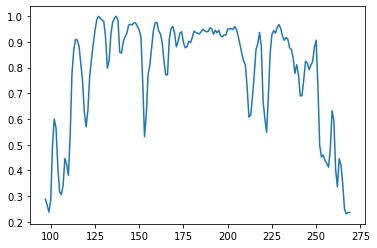

In [4]:
a = pd.read_csv('../data/physicalData/OSISAF_C4_IceCover.csv')
a.iceC.plot()

In [31]:
import xarray as xr
remote_data = xr.open_dataset('http://thredds.aoos.org/thredds/dodsC/NSIDC_SEA_ICE_CON.nc?latitude[150:1:151][150:1:151],longitude[20:1:21][0:1:1],Sea_Ice_Concentration[12466:1:12467][0:1:0][0:1:0],time[12466:1:12467]#fillmismatch')
remote_data

<xarray.Dataset>
Dimensions:                (time: 2, x: 2, x_1: 1, y: 2, y_1: 1)
Coordinates:
  * time                   (time) datetime64[ns] 2017-08-01T07:00:00.000030 2...
    latitude               (y, x) float64 ...
    longitude              (y, x) float64 ...
Dimensions without coordinates: x, x_1, y, y_1
Data variables:
    Sea_Ice_Concentration  (time, y_1, x_1) float32 ...
Attributes:
    Conventions:             CF-1.4
    institution:             National Snow & Ice Data Center, Boulder, CO
    title:                   Near-Real-Time DMSP SSM/I-SSMIS Daily Polar Grid...
    source:                  See the title and references for this information
    comment:                 Not set at this time
    references:              Documentation available at: http://nsidc.org/dat...
    history:                 Each time slice was created with the following s...
    DODS.strlen:             0
    projection.DODS.strlen:  0

In [50]:
C11 = 70.0136, -166.85755
C1 = 70.8357, -163.1044
C4 = 71.038916, -160.50353

import xarray as xr
remote_data = xr.open_dataset('http://thredds.aoos.org/thredds/dodsC/NSIDC_SEA_ICE_CON.nc?latitude[0:1:1][0:1:1],longitude[160:1:161][0:1:1],Sea_Ice_Concentration[12466:1:12467][0:1:0][0:1:0],time[12466:1:12467]#fillmismatch')
remote_data

<xarray.Dataset>
Dimensions:                (time: 2, x: 2, x_1: 1, y: 2, y_1: 1)
Coordinates:
  * time                   (time) datetime64[ns] 2017-08-01T07:00:00.000030 2...
    latitude               (y, x) float64 ...
    longitude              (y, x) float64 ...
Dimensions without coordinates: x, x_1, y, y_1
Data variables:
    Sea_Ice_Concentration  (time, y_1, x_1) float32 ...
Attributes:
    Conventions:             CF-1.4
    institution:             National Snow & Ice Data Center, Boulder, CO
    title:                   Near-Real-Time DMSP SSM/I-SSMIS Daily Polar Grid...
    source:                  See the title and references for this information
    comment:                 Not set at this time
    references:              Documentation available at: http://nsidc.org/dat...
    history:                 Each time slice was created with the following s...
    DODS.strlen:             0
    projection.DODS.strlen:  0